In [1]:
import MLDS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Lorenz = MLDS.DynamicalSystems.Lorenz()

x_0 = np.random.rand(3)
dt = 0.05
t_final = 210

Lorenz.trajectory(x_0,t_final, dt)

array([[  0.88037433,   0.9991351 ,   1.60036097, ..., -11.31136258,
        -13.9354565 , -14.54324746],
       [  0.56084334,   1.72621065,   3.31857025, ..., -17.36797425,
        -17.75257281, -12.80752259],
       [  0.77461061,   0.72670802,   0.78657178, ...,  21.98240553,
         29.96347625,  36.80946999]])

In [3]:
X = Lorenz.X[:,100:]
L_train = 2000
L_test = 1000

x_train = X[0, :L_train]
y_train = X[2, :L_train]
x_test = X[0,L_train:L_train+L_test]
y_test = X[2,L_train:L_train+L_test]

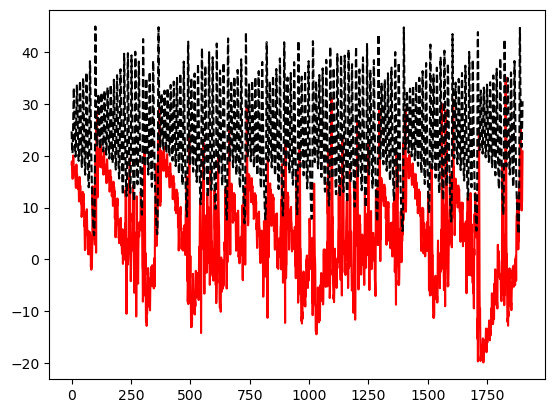

In [4]:
net = MLDS.models.RCN(
    n_reservoir=300,
    read_out_type='linear')
y_hat_train = net.train(x_train, y_train)
y_hat_test = net.predict(x_test)

plt.plot(y_hat_train[:,net.transient:].T, 'r')
plt.plot(y_train[net.transient:].T, 'k--')
plt.show()

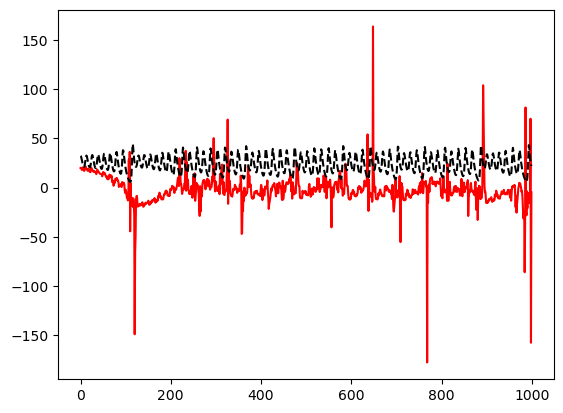

In [5]:
plt.plot(y_hat_test.T, 'r')
plt.plot(y_test.T, 'k--')
plt.show()

In [6]:
aug = net.get_augmented_states()[:,net.transient:]
sq = net.get_square_states()[:,net.transient:]

In [7]:
plt.figure(figsize = (1,2))
plt.matshow(aug[:,:1000])
plt.colorbar()


In [8]:
plt.figure(figsize = (1,2))
plt.matshow(sq[:,:1000])
plt.colorbar()

In [9]:
R = net.states[:,net.transient:]
Q = np.linalg.pinv(R@R.T)
plt.imshow(Q)

In [10]:
Q_aug = np.linalg.pinv(aug@aug.T)
plt.imshow(Q)

In [11]:
Q_sq = np.linalg.pinv(sq@sq.T)
plt.imshow(Q)

In [12]:
x_aut = x_train.reshape(1,-1)
x_aut.shape

(1, 2000)

In [13]:
autonet = MLDS.models.AutonomousRCN(
    n_reservoir = 500,
    spectral_radius = 1,
    force_sr=True,
    sparsity= 0.92,
    regularization=1e-6,
    #bias = 1,
    input_scaling=.1,
    read_out_type='linear')

train_pred = autonet.train(x_train)


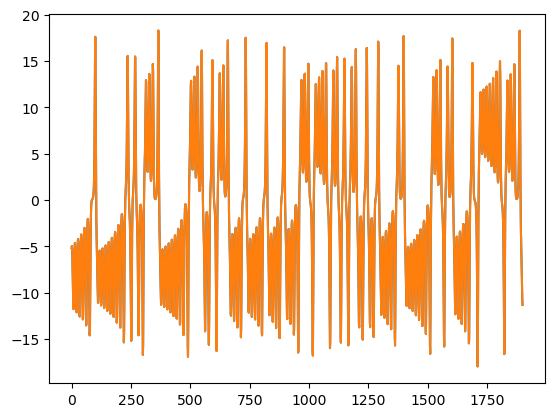

In [16]:
plt.plot(train_pred.T[100:])
plt.plot(x_train[100:])
plt.show()

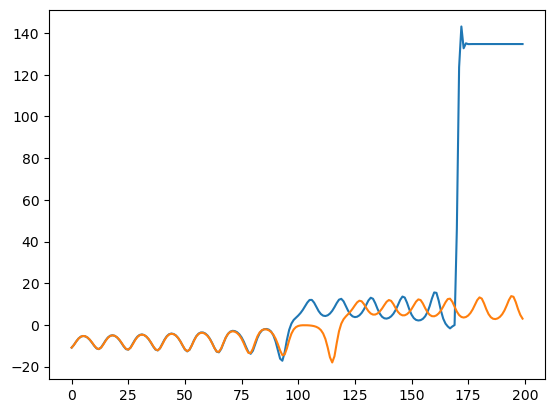

In [17]:
L = 200
pred = autonet.predict(L)
plt.plot(pred.T)
plt.plot(x_test[:L].T)
plt.show()